# Airbnb Boston data wrangling and observations
The data in this notebook is available under a creative commons 0 license (public domain). It was originally provided by kaggle.com. 

The goal of this notebook is to wrangle Airbnb-Boston data, propose relevant questions, and use the data to provide helpful answers. 

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
#Read in Boston open data on Airbnb from Kaggle
b_cal = pd.read_csv('boston/calendar.csv')
b_list = pd.read_csv('boston/listings.csv')
b_rev = pd.read_csv('boston/reviews.csv')

##### The focus of this notebook will be the Boston data, but the Seattle data is here for possible future wrangling/observing

In [34]:
#Read in Seattle open data on Airbnb from Kaggle
s_cal = pd.read_csv('seattle/calendar.csv')
s_list = pd.read_csv('seattle/listings.csv')
s_rev = pd.read_csv('seattle/reviews.csv')

In [35]:
dataframes = [b_cal, b_list, b_rev, s_cal, s_list, s_rev]
x = 0
for frame in dataframes:
    print(frame.shape)

(1308890, 4)
(3585, 95)
(68275, 6)
(1393570, 4)
(3818, 92)
(84849, 6)


The listing files have many columns, whereas the calendar and review data are much smaller in scope. It looks like the challenge will be weeding through the listing data.

In [36]:
b_cal.head(2)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN


In [37]:
b_rev.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...


In [38]:
b_list.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.3


In [39]:
b_list.shape

(3585, 95)

In [40]:
b_cal.shape

(1308890, 4)

In [41]:
b_rev.shape

(68275, 6)

In [42]:
for col in b_list.columns:
    print(f'{col}...{len(b_list[col].unique())}')

id...3585
listing_url...3585
scrape_id...1
last_scraped...1
name...3504
summary...3114
space...2269
description...3423
experiences_offered...1
neighborhood_overview...1729
notes...1270
transit...1860
access...1763
interaction...1618
house_rules...1929
thumbnail_url...2987
medium_url...2987
picture_url...3585
xl_picture_url...2987
host_id...2181
host_url...2181
host_name...1334
host_since...1281
host_location...177
host_about...1241
host_response_time...5
host_response_rate...53
host_acceptance_rate...73
host_is_superhost...2
host_thumbnail_url...2174
host_picture_url...2174
host_neighbourhood...54
host_listings_count...35
host_total_listings_count...35
host_verifications...83
host_has_profile_pic...2
host_identity_verified...2
street...1239
neighbourhood...31
neighbourhood_cleansed...25
neighbourhood_group_cleansed...1
city...39
state...1
zipcode...44
market...5
smart_location...39
country_code...1
country...1
latitude...3585
longitude...3585
is_location_exact...2
property_type...14
ro

#### Observation
It looks like there are several columns with only 1 unique value. They might've been used to sort from a larger dataset. Now, however, these won't tell us anything, so we'll get rid of them.

In [43]:
#Drop columns with less than 2 unique values
for col in b_list.columns:
    if len(b_list[col].unique()) < 2:
        b_list.drop(col,axis=1,inplace=True)
        print(f"Dropped {col}")

Dropped scrape_id
Dropped last_scraped
Dropped experiences_offered
Dropped neighbourhood_group_cleansed
Dropped state
Dropped country_code
Dropped country
Dropped has_availability
Dropped calendar_last_scraped
Dropped requires_license
Dropped license
Dropped jurisdiction_names


In [44]:
for col in b_list.columns:
    print(f'{col}...{len(b_list[col].unique())}')

id...3585
listing_url...3585
name...3504
summary...3114
space...2269
description...3423
neighborhood_overview...1729
notes...1270
transit...1860
access...1763
interaction...1618
house_rules...1929
thumbnail_url...2987
medium_url...2987
picture_url...3585
xl_picture_url...2987
host_id...2181
host_url...2181
host_name...1334
host_since...1281
host_location...177
host_about...1241
host_response_time...5
host_response_rate...53
host_acceptance_rate...73
host_is_superhost...2
host_thumbnail_url...2174
host_picture_url...2174
host_neighbourhood...54
host_listings_count...35
host_total_listings_count...35
host_verifications...83
host_has_profile_pic...2
host_identity_verified...2
street...1239
neighbourhood...31
neighbourhood_cleansed...25
city...39
zipcode...44
market...5
smart_location...39
latitude...3585
longitude...3585
is_location_exact...2
property_type...14
room_type...3
accommodates...14
bathrooms...13
bedrooms...7
beds...12
bed_type...5
amenities...3092
square_feet...38
price...324


## Observations
Data from the calendar could be used with the b_list to increase its value for our observations. For example, we could add the average price (when available) of a listing and see how that correlates with various factors (such as square footage, review scores, location, etc.)

In [47]:
for col in b_cal.columns:
    print(f'{col}....{len(b_cal[col].unique())}')

listing_id....3585
date....365
available....2
price....1247


In [48]:
for col in b_rev.columns:
    print(f'{col}....{len(b_rev[col].unique())}')
    

listing_id....2829
id....68275
date....2045
reviewer_id....63789
reviewer_name....14775
comments....67313


In [49]:
id_difs = set(b_rev['listing_id']) - set(b_cal['listing_id'])
id_difs2 = set(b_rev['listing_id']) - set(b_list['id'])

print(id_difs)
print(id_difs2)

set()
set()


### Observation
It looked like the listing_id was consistent across the three files. The set subtraction above confirmed this.

In [50]:
b_cal.available.unique()

array(['f', 't'], dtype=object)

In [52]:
len(b_cal['price'].unique())

1247

In [53]:
not_avail_price = set(b_cal[b_cal['available'] == 'f']['listing_id']) - set(b_cal[b_cal['price']!= 'nan']['listing_id'])
print(not_avail_price)
print([b_cal[b_cal['listing_id'] == x] for x in not_avail_price])

set()
[]


###### Observation
None of the non-available rooms have prices listed. Unsurprising, but it was a good extra step in clarifying whether we could use that data or not in Q1.

# Q1 Is there a seasonal timeframe in which Boston AirBNB listings are cheaper?
### A question for inquiring customers
For our purposes, this will be a simple comparison across all available listings. We won't attempt to look at comparable listings. Rather, we'll just look at the average cost per night across all listings through the year

### Q1a 
After initial observation, there's a clear spike at one point in the year. Is there a possible explanation for this (Boston Marathon, sports playoffs)?

In [98]:
#created new dataframe for ease of use (for example, when changing values no warning messages about changing a slice)
b_cal_q1 = pd.DataFrame(b_cal[b_cal['available'] == 't'])

In [99]:
b_cal_q1.shape

(643037, 4)

In [100]:
print(f'We eliminated {b_cal.shape[0]-b_cal_q1.shape[0]} listings')

We eliminated 665853 listings


That's over half the listings on the calendar eliminated because they were marked as 'f' for availability and also have no pricing info (as we discovered), so they'll be no help in answering Q1. 

In [101]:
b_cal_q1.columns

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

In [102]:
b_cal_q1.head()

,listing_id,date,available,price
365,3075044,2017-08-22,t,$65.00
366,3075044,2017-08-21,t,$65.00
367,3075044,2017-08-20,t,$65.00
368,3075044,2017-08-19,t,$75.00
369,3075044,2017-08-18,t,$75.00


In [103]:
b_cal_q1.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [104]:
check = dict()
for x in b_cal_q1['price']:
    if x[0] in check:
        check[x[0]] += 1
    else:
        check[x[0]] = 1
print(check)

{'$': 643037}


Well, nobody missed a dollar sign on the front of the prices.

In [105]:
len(b_cal_q1['price'])

643037

In [106]:
#eliminate dollar sign from price values. This will allow us to coerce values later and not get 'nan'
new_price = np.array([price[1:] for price in b_cal_q1['price']])
print(new_price)
print(len(new_price))

['65.00' '65.00' '65.00' ..., '62.00' '62.00' '62.00']
643037


In [107]:
b_cal_q1.loc[:,'price'] = new_price

In [118]:
#coerce price values to floats
b_cal_q1.loc[:,'price'] = pd.to_numeric(b_cal_q1['price'], errors='coerce')

In [119]:
b_cal_q1.head(2)

,listing_id,date,available,price
365,3075044,2017-08-22,t,65.0
366,3075044,2017-08-21,t,65.0


In [120]:
b_cal_q1.dtypes

listing_id      int64
date           object
available      object
price         float64
dtype: object

In [139]:
date_price = b_cal_q1.groupby('date').mean()['price']

In [218]:
minimum = date_price[date_price==date_price.min()].index[0]
maximum = date_price[date_price==date_price.max()].index[0]
print(f'The lowest average price was on {minimum}')
print(f'The highest average price was on {maximum}')

The lowest average price was on 2017-03-06
The highest average price was on 2016-09-17


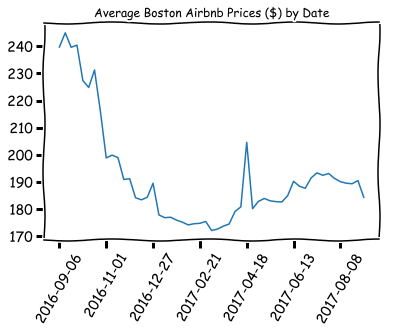

In [219]:
#Average price snapshot once per week
plt.xkcd()
plt.title('Average Boston Airbnb Prices ($) by Date')
plt.plot(date_price.index[::7], date_price[::7])
plt.xticks([x for x in range(0,len(date_price)//7,8)], rotation=60);

## Q1 Answer

It looks like, from September 2016 to August 2017, the cheapest prices were in late February and early March. Boston might be a good valentine's day vacay!

### Q1a Answer
The Boston Marthon was on April 17 in 2017. This exactly coincides with the spike in the graph at that time. It appears that Airbnb renters know how to capitalize on their city's event!


# Q2 Did the steady rise in Airbnb rooms available (from 570 on 9-6-2016 to 1801 on 9-5-2017) precipitate a distinguishable rise or drop in general prices?
## Seeing this change might also impact how we think about the response to Q1
Again, for this question we don't need to get too fancy with the data (trying to find comprable rooms and such). We just want a general overview.
### Q2a
Should customers wait until the Airbnb market is saturated to get a room or jump on the still relatively new advent of the phenomenon?!

### Q2b
Is there a market for new renters or did the influx of new airbnb homes saturate the market so that it's almost more desirable to have your deadbeat college roommate come stay with you permanently for a few bucks a night?

*back to question 1 wrangling for now*

# Q3 What two or three things most often generally correlate with 1) a high priced Airbnb per night and 2) a high grossing Airbnb?

Yet again, it will be difficult to give an exact determination, because no two airbnbs are exactly alike--aka, there are many more than 1 dynamic variable. Nonetheless, the attempt will be made to offer some general observations on this front.

In [44]:
b_cal_q1.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object